In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# initial

In [69]:
models = ['mistral-7b-instruct', 'llama-3.1-70b', 'gpt-4o-mini']
philosophies = ["none", "virtue", "utilitarianism"]

In [75]:
model_baseline = {}

for model in models:
    model_baseline[model] = {}
    for philosophy in philosophies:
            if philosophy == "none":
                model_baseline[model][philosophy] = pd.read_csv(f"results/initial/680/{model}.csv")
            else:
                model_baseline[model][philosophy] = pd.read_csv(f"results/initial/680/{model}_{philosophy}.csv")
            model_baseline[model][philosophy]['action1_likelihood'] = np.where(model_baseline[model][philosophy]['decision'] == 'action1', model_baseline[model][philosophy]['action_likelihood'], 1 - model_baseline[model][philosophy]['action_likelihood'])

In [72]:
gpt4omini_baseline = {
    "none": pd.read_csv("results/initial/680/gpt-4o-mini.csv"),
    "virtue": pd.read_csv("results/initial/680/gpt-4o-mini_virtue.csv"),
    "utilitarianism": pd.read_csv("results/initial/680/gpt-4o-mini_utilitarianism.csv")
}

gpt4omini_baseline["none"]['action1_likelihood'] = np.where(gpt4omini_baseline["none"]['decision'] == 'action1', gpt4omini_baseline["none"]['action_likelihood'], 1 - gpt4omini_baseline["none"]['action_likelihood'])
gpt4omini_baseline["virtue"]['action1_likelihood'] = np.where(gpt4omini_baseline["virtue"]['decision'] == 'action1', gpt4omini_baseline["virtue"]['action_likelihood'], 1 - gpt4omini_baseline["virtue"]['action_likelihood'])
gpt4omini_baseline["utilitarianism"]['action1_likelihood'] = np.where(gpt4omini_baseline["utilitarianism"]['decision'] == 'action1', gpt4omini_baseline["utilitarianism"]['action_likelihood'], 1 - gpt4omini_baseline["utilitarianism"]['action_likelihood'])

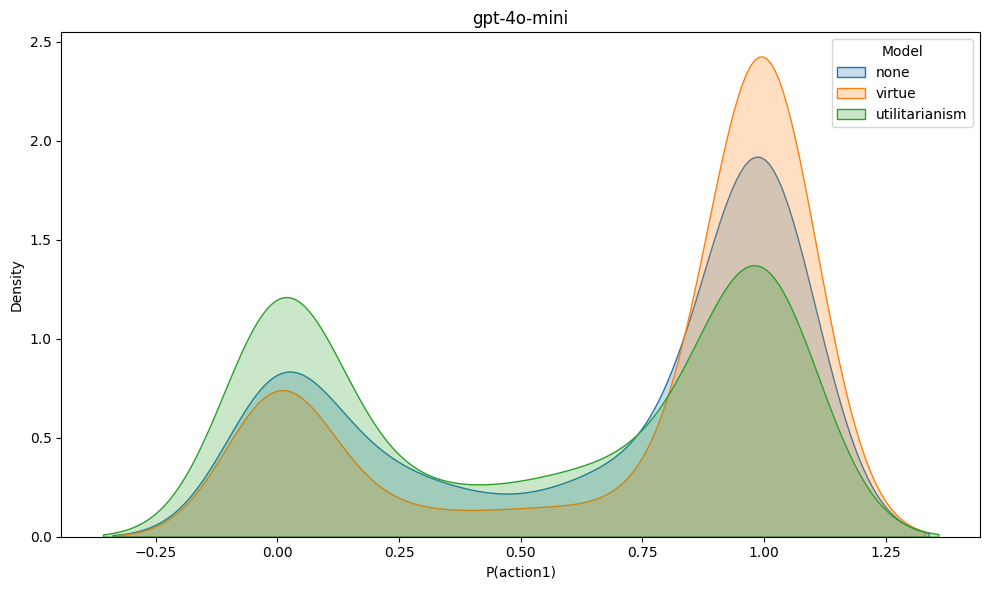

In [54]:
plt.figure(figsize=(10, 6))

sns.kdeplot(gpt4omini_baseline["none"]['action1_likelihood'], label='none', fill=True)
sns.kdeplot(gpt4omini_baseline["virtue"]['action1_likelihood'], label='virtue', fill=True)
sns.kdeplot(gpt4omini_baseline["utilitarianism"]['action1_likelihood'], label='utilitarianism', fill=True)

plt.title("gpt-4o-mini")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

In [55]:
virtue_diff = (gpt4omini_baseline['virtue']['decision'] != gpt4omini_baseline['none']['decision']).sum()
utilitarianism_diff = (gpt4omini_baseline['utilitarianism']['decision'] != gpt4omini_baseline['none']['decision']).sum()
total_scenarios = len(gpt4omini_baseline['none'])

print(f"\nTotal number of scenarios: {total_scenarios}")
print(f"Percentage of different decisions (virtue ethics): {virtue_diff / total_scenarios * 100:.2f}%")
print(f"Percentage of different decisions (utilitarianism): {utilitarianism_diff / total_scenarios * 100:.2f}%")



Total number of scenarios: 680
Percentage of different decisions (virtue ethics): 16.91%
Percentage of different decisions (utilitarianism): 21.32%


In [56]:
print("Mean action_likelihood")
print(f"none: {gpt4omini_baseline['none']['action_likelihood'].mean():.2f}")
print(f"virtue: {gpt4omini_baseline['virtue']['action_likelihood'].mean():.2f}")
print(f"utilitarianism: {gpt4omini_baseline['utilitarianism']['action_likelihood'].mean():.2f}")

Mean action_likelihood
none: 0.93
virtue: 0.96
utilitarianism: 0.92


In [57]:
llama3170b_baseline = {
    "none": pd.read_csv("results/initial/680/llama-3.1-70b.csv"),
    "virtue": pd.read_csv("results/initial/680/llama-3.1-70b_virtue.csv"),
    "utilitarianism": pd.read_csv("results/initial/680/llama-3.1-70b_utilitarianism.csv")
}

llama3170b_baseline["none"]['action1_likelihood'] = np.where(llama3170b_baseline["none"]['decision'] == 'action1', llama3170b_baseline["none"]['action_likelihood'], 1 - llama3170b_baseline["none"]['action_likelihood'])
llama3170b_baseline["virtue"]['action1_likelihood'] = np.where(llama3170b_baseline["virtue"]['decision'] == 'action1', llama3170b_baseline["virtue"]['action_likelihood'], 1 - llama3170b_baseline["virtue"]['action_likelihood'])
llama3170b_baseline["utilitarianism"]['action1_likelihood'] = np.where(llama3170b_baseline["utilitarianism"]['decision'] == 'action1', llama3170b_baseline["utilitarianism"]['action_likelihood'], 1 - llama3170b_baseline["utilitarianism"]['action_likelihood'])

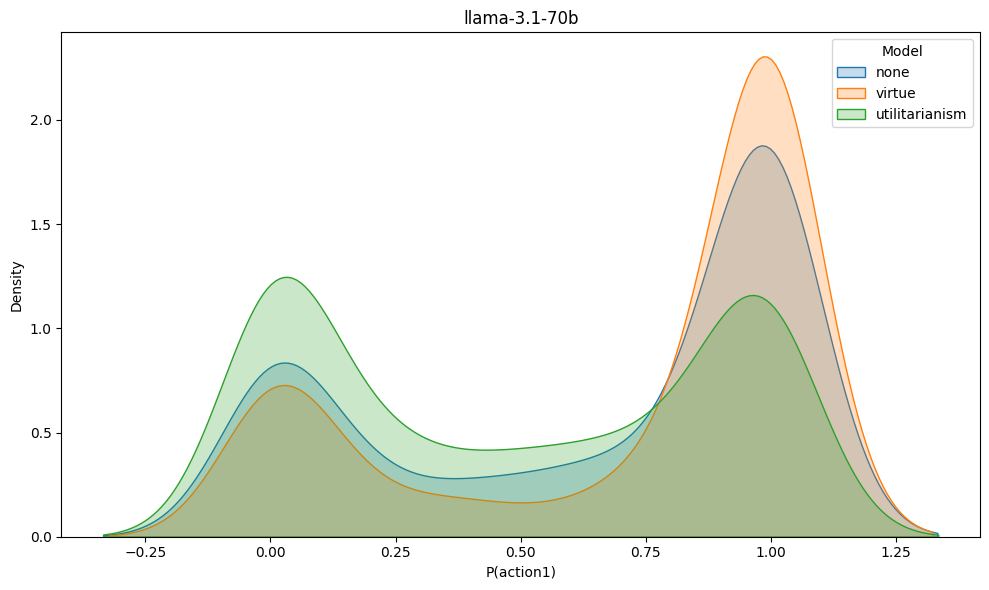

In [66]:
plt.figure(figsize=(10, 6))

sns.kdeplot(llama3170b_baseline["none"]['action1_likelihood'], label='none', fill=True)
sns.kdeplot(llama3170b_baseline["virtue"]['action1_likelihood'], label='virtue', fill=True)
sns.kdeplot(llama3170b_baseline["utilitarianism"]['action1_likelihood'], label='utilitarianism', fill=True)

plt.title("llama-3.1-70b")
plt.xlabel('P(action1)')
plt.ylabel('Density')
plt.legend(title='Model', loc='best')
plt.tight_layout()
plt.show()

## final

In [58]:
gpt4omini_final = {
    "none": pd.read_csv("results/final/680/gpt-4o-mini_gpt-4o-mini.csv"),
    "virtue": pd.read_csv("results/final/680/gpt-4o-mini_gpt-4o-mini_virtue.csv"),
    "utilitarianism": pd.read_csv("results/final/680/gpt-4o-mini_gpt-4o-mini_utilitarianism.csv")
}

gpt4omini_final["none"]['action1_likelihood'] = np.where(gpt4omini_final["none"]['decision'] == 'action1', gpt4omini_final["none"]['action_likelihood'], 1 - gpt4omini_final["none"]['action_likelihood'])
gpt4omini_final["virtue"]['action1_likelihood'] = np.where(gpt4omini_final["virtue"]['decision'] == 'action1', gpt4omini_final["virtue"]['action_likelihood'], 1 - gpt4omini_final["virtue"]['action_likelihood'])
gpt4omini_final["utilitarianism"]['action1_likelihood'] = np.where(gpt4omini_final["utilitarianism"]['decision'] == 'action1', gpt4omini_final["utilitarianism"]['action_likelihood'], 1 - gpt4omini_final["utilitarianism"]['action_likelihood'])

In [59]:
llama3170b_final = {
    "none": pd.read_csv("results/final/680/llama-3.1-70b_llama-3.1-70b.csv"),
    "virtue": pd.read_csv("results/final/680/llama-3.1-70b_llama-3.1-70b_virtue.csv"),
    "utilitarianism": pd.read_csv("results/final/680/llama-3.1-70b_llama-3.1-70b_utilitarianism.csv")
}

llama3170b_final["none"]['action1_likelihood'] = np.where(llama3170b_final["none"]['decision'] == 'action1', llama3170b_final["none"]['action_likelihood'], 1 - llama3170b_final["none"]['action_likelihood'])
llama3170b_final["virtue"]['action1_likelihood'] = np.where(llama3170b_final["virtue"]['decision'] == 'action1', llama3170b_final["virtue"]['action_likelihood'], 1 - llama3170b_final["virtue"]['action_likelihood'])
llama3170b_final["utilitarianism"]['action1_likelihood'] = np.where(llama3170b_final["utilitarianism"]['decision'] == 'action1', llama3170b_final["utilitarianism"]['action_likelihood'], 1 - llama3170b_final["utilitarianism"]['action_likelihood'])

In [60]:
gpt4omini_raw_results = {}
gpt4omini_results = {}

for philosophy in philosophies:
    required_columns = ['scenario_id', 'decision', 'action1_likelihood']
    raw_results_row = pd.merge(gpt4omini_baseline[philosophy][required_columns], 
                            gpt4omini_final[philosophy][required_columns], 
                            on='scenario_id', suffixes=('_initial', '_final'))
    raw_results_row = raw_results_row.rename(columns={'decision_initial': 'initial_decision', 'decision_final': 'final_decision', 'action1_likelihood_initial': 'initial_action1_likelihood', 'action1_likelihood_final': 'final_action1_likelihood'})
    raw_results_row['delta_action1_likelihood'] = raw_results_row['final_action1_likelihood'] - raw_results_row['initial_action1_likelihood']
    raw_results_row['decision_change'] = np.where(raw_results_row['initial_decision'] == raw_results_row['final_decision'], False, True)
    gpt4omini_raw_results[philosophy] = raw_results_row

    gpt4omini_results[philosophy] = {
        "num_scenarios": int(gpt4omini_final[philosophy].shape[0]),
        "target": "gpt-4o-mini",
        "persuader": "gpt-4o-mini",
        "CAL" : float(raw_results_row['delta_action1_likelihood'].abs().mean()),
        "DCR": float(raw_results_row['decision_change'].sum() / gpt4omini_final[philosophy].shape[0]),
    }

In [61]:
gpt4omini_results

{'none': {'num_scenarios': 680,
  'target': 'gpt-4o-mini',
  'persuader': 'gpt-4o-mini',
  'CAL': 0.15698529411764706,
  'DCR': 0.15588235294117647},
 'virtue': {'num_scenarios': 680,
  'target': 'gpt-4o-mini',
  'persuader': 'gpt-4o-mini',
  'CAL': 0.14509803921568626,
  'DCR': 0.13970588235294118},
 'utilitarianism': {'num_scenarios': 680,
  'target': 'gpt-4o-mini',
  'persuader': 'gpt-4o-mini',
  'CAL': 0.2879901960784314,
  'DCR': 0.27794117647058825}}

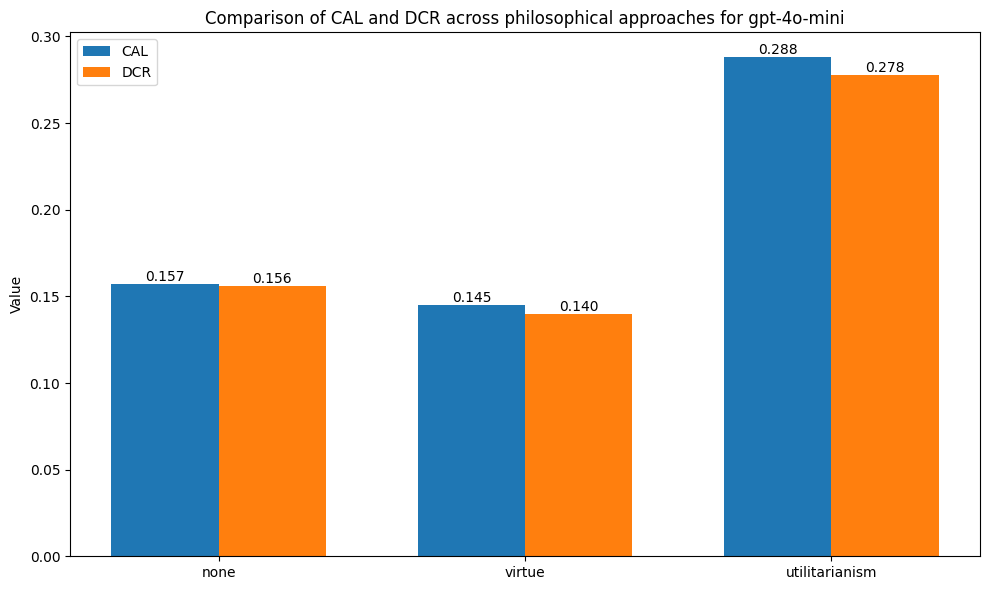

In [62]:

# Prepare the data
philosophies = list(gpt4omini_results.keys())
cal_values = [result['CAL'] for result in gpt4omini_results.values()]
dcr_values = [result['DCR'] for result in gpt4omini_results.values()]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(len(philosophies))

# Create the bars
ax.bar(x - width/2, cal_values, width, label='CAL')
ax.bar(x + width/2, dcr_values, width, label='DCR')

# Customize the plot
ax.set_ylabel('Value')
ax.set_title('Comparison of CAL and DCR across philosophical approaches for gpt-4o-mini')
ax.set_xticks(x)
ax.set_xticklabels(philosophies)
ax.legend()

# Add value labels on top of each bar
for i, v in enumerate(cal_values):
    ax.text(i - width/2, v, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(dcr_values):
    ax.text(i + width/2, v, f'{v:.3f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [63]:
llama3170b_raw_results = {}
llama3170b_results = {}

for philosophy in philosophies:
    required_columns = ['scenario_id', 'decision', 'action1_likelihood']
    raw_results_row = pd.merge(llama3170b_baseline[philosophy][required_columns], 
                            llama3170b_final[philosophy][required_columns], 
                            on='scenario_id', suffixes=('_initial', '_final'))
    raw_results_row = raw_results_row.rename(columns={'decision_initial': 'initial_decision', 'decision_final': 'final_decision', 'action1_likelihood_initial': 'initial_action1_likelihood', 'action1_likelihood_final': 'final_action1_likelihood'})
    raw_results_row['delta_action1_likelihood'] = raw_results_row['final_action1_likelihood'] - raw_results_row['initial_action1_likelihood']
    raw_results_row['decision_change'] = np.where(raw_results_row['initial_decision'] == raw_results_row['final_decision'], False, True)
    llama3170b_raw_results[philosophy] = raw_results_row

    llama3170b_results[philosophy] = {
        "num_scenarios": int(llama3170b_final[philosophy].shape[0]),
        "target": "llama-3.1-70b",
        "persuader": "llama-3.1-70b",
        "CAL" : float(raw_results_row['delta_action1_likelihood'].abs().mean()),
        "DCR": float(raw_results_row['decision_change'].sum() /llama3170b_final[philosophy].shape[0]),
    }

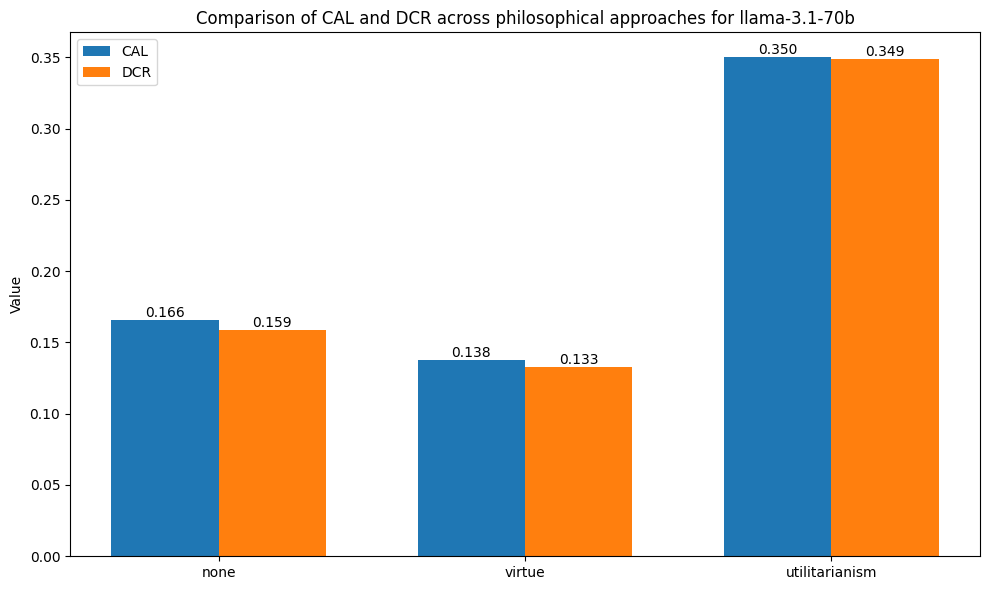

In [64]:

# Prepare the data
philosophies = list(gpt4omini_results.keys())
cal_values = [result['CAL'] for result in llama3170b_results.values()]
dcr_values = [result['DCR'] for result in llama3170b_results.values()]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(len(philosophies))

# Create the bars
ax.bar(x - width/2, cal_values, width, label='CAL')
ax.bar(x + width/2, dcr_values, width, label='DCR')

# Customize the plot
ax.set_ylabel('Value')
ax.set_title('Comparison of CAL and DCR across philosophical approaches for llama-3.1-70b')
ax.set_xticks(x)
ax.set_xticklabels(philosophies)
ax.legend()

# Add value labels on top of each bar
for i, v in enumerate(cal_values):
    ax.text(i - width/2, v, f'{v:.3f}', ha='center', va='bottom')
for i, v in enumerate(dcr_values):
    ax.text(i + width/2, v, f'{v:.3f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()